# Libraries import #
***
---

In [1]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('bmh')
from sklearn.tree import plot_tree



# Extract the Dataset | Only working with "XOM" Exxon Mobil #
***
---

In [2]:
df= pd.read_csv("/Users/me/Downloads/oil and gas stock prices.csv")
df = df.loc[df.Symbol=="XOM"]
df.head()
df.index = pd.to_datetime(df.Date)
df = df[["Close"]].copy()
df.rename(columns={"Close":"Value"},inplace=True)
df.head()

,Value
Date,
2000-01-03,39.16
2000-01-04,38.41
2000-01-05,40.50
2000-01-06,42.59
2000-01-07,42.47


In [3]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)


In [4]:
df.head()

,Value,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,
2000-01-03,39.16,0,0,1,1,2000,3,3,1
2000-01-04,38.41,0,1,1,1,2000,4,4,1
2000-01-05,40.50,0,2,1,1,2000,5,5,1
2000-01-06,42.59,0,3,1,1,2000,6,6,1
2000-01-07,42.47,0,4,1,1,2000,7,7,1


In [5]:
df.to_csv('withfeatures.csv')

### Target relationship ###
***
---

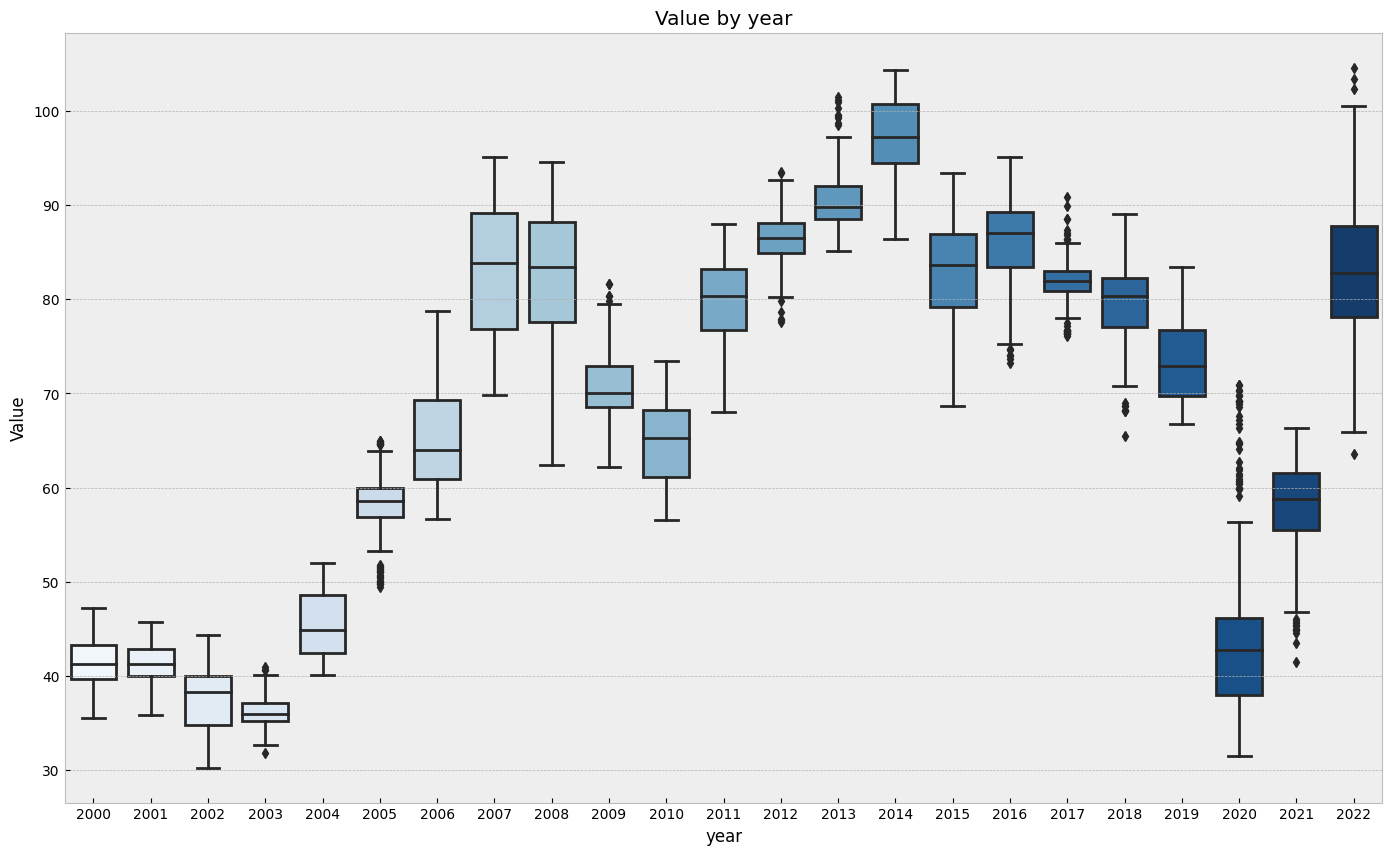

In [6]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.boxplot(data=df, x="year", y='Value', palette='Blues')
ax.set_title('Value by year')
plt.show()

In [7]:
df= df[["Value"]].copy()
df.head()

,Value
Date,
2000-01-03,39.16
2000-01-04,38.41
2000-01-05,40.50
2000-01-06,42.59
2000-01-07,42.47


In [8]:
df.dtypes

Value    float64
dtype: object

### Plotting the data ###
### Data from 2000 to 2022 ###
***
---

In [9]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


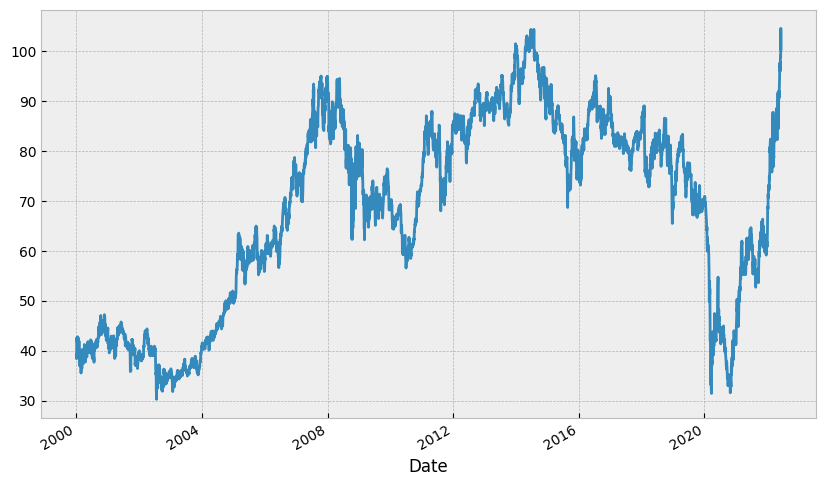

In [10]:

df["Value"].plot(figsize=(10,6));

# Outliers detection #
##### We have Several outliers from 2000-2005 and 2021 #####
##### The first round are far from the "Regular price" but at the same time we had a downfall due COVID-19 #####
##### We kept the outliers to learn from that kind of irregular pattern #####


***
---

<Axes: ylabel='Frequency'>

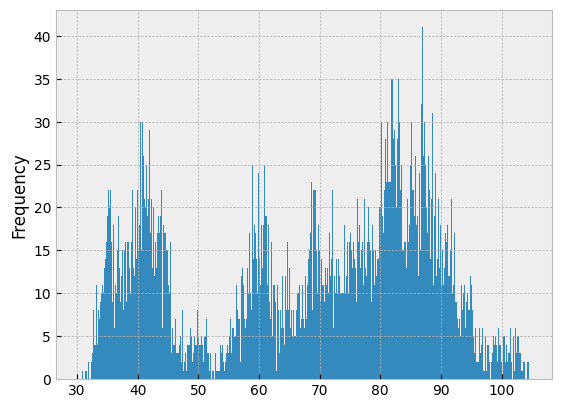

In [11]:
df["Value"].plot(kind='hist', bins=500)


### The identification of "Outliers" were prices in the Close of the day from 2000 to 20022 ###
### The outliers were the closing values under 40 USD #
***
---


<Axes: title={'center': 'Outliers'}, xlabel='Date'>

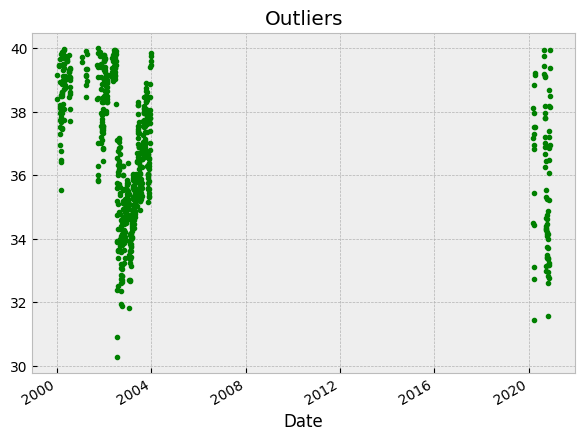

In [12]:
df.query("Value < 40")["Value"] \
    .plot(style='.',
          figsize=(7, 5),
          color="green",
          title='Outliers')

## Creation of Features ##
This features were made with the intentation to have extra information from the Closing value and iterate over them 
***
---

In [13]:
for i in range(4,0,-1):
    df["t-"+str(i)] = df["Value"].shift(i)

In [14]:
df.dropna(inplace=True)
df.head(15)

,Value,t-4,t-3,t-2,t-1
Date,,,,,
2000-01-07,42.47,39.16,38.41,40.50,42.59
2000-01-10,41.88,38.41,40.50,42.59,42.47
2000-01-11,42.00,40.50,42.59,42.47,41.88
2000-01-12,41.75,42.59,42.47,41.88,42.00
2000-01-13,42.72,42.47,41.88,42.00,41.75
2000-01-14,41.88,41.88,42.00,41.75,42.72
2000-01-18,42.38,42.00,41.75,42.72,41.88
2000-01-19,42.78,41.75,42.72,41.88,42.38
2000-01-20,41.84,42.72,41.88,42.38,42.78


## Train & Test ##
The implementation of the X,y to provice values to the Machine Learning Model.
***
---

In [15]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

X_train = X[:3438]
X_test = X[3438:]
y_train = y[:3438]
y_test = y[3438:]

print("Shape X_train:", X_train.shape)
print("Shape X_test", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (3438, 4)
Shape X_test (2205, 4)
Shape y_train: (3438,)
Shape y_test: (2205,)


In [16]:
df.iloc[3428:]

,Value,t-4,t-3,t-2,t-1
Date,,,,,
2013-08-26,87.09,86.83,86.42,86.98,87.52
2013-08-27,86.82,86.42,86.98,87.52,87.09
2013-08-28,88.84,86.98,87.52,87.09,86.82
2013-08-29,87.27,87.52,87.09,86.82,88.84
2013-08-30,87.16,87.09,86.82,88.84,87.27
...,...,...,...,...,...
2022-06-06,98.84,96.00,97.84,97.67,99.09
2022-06-07,103.37,97.84,97.67,99.09,98.84
2022-06-08,104.59,97.67,99.09,98.84,103.37


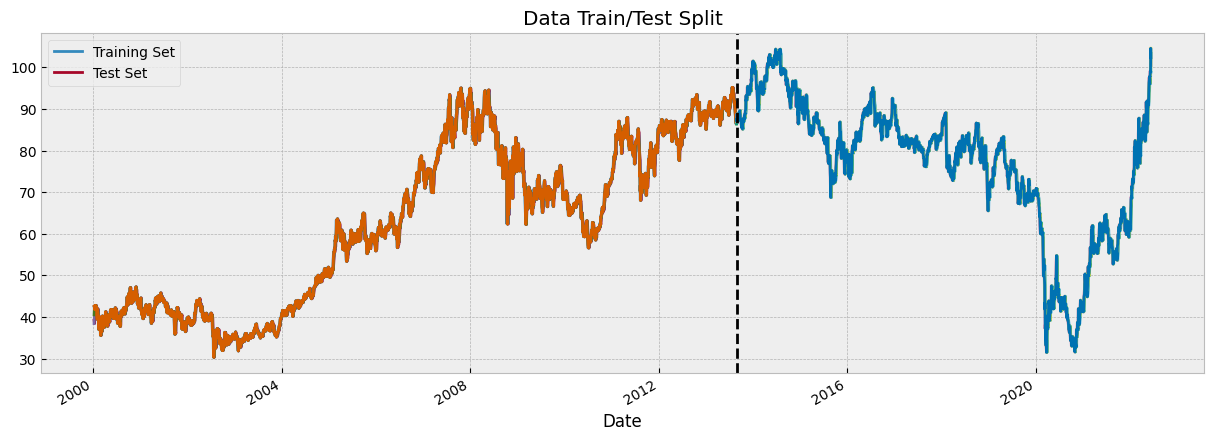

In [17]:
train = df.loc[df.index < '2013-08-26']
test = df.loc[df.index >= '2013-08-26']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2013-08-26', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

### Implementation of a Decission Tree Regressor ###
***
---

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
def prediction(model, x_test):
    preds = x_test[0]
    preds_out = []
    
    for i in range(len(X_test)):
        pred = model.predict([preds])[0]
        preds_out.append(pred)
        
        preds2 = np.array([preds[1:]]) 
        
        preds = np.c_[preds2, np.array([pred])][0]
        
    return preds_out

In [20]:
preds = prediction(tree, X_test)


### Visualization of the prediction ###
y_test values were in the downfall of the prices of 2021 due the COVID-19
Stock prices are volatily and subjected to several factors like OPEC regulations and social impact 
***
---

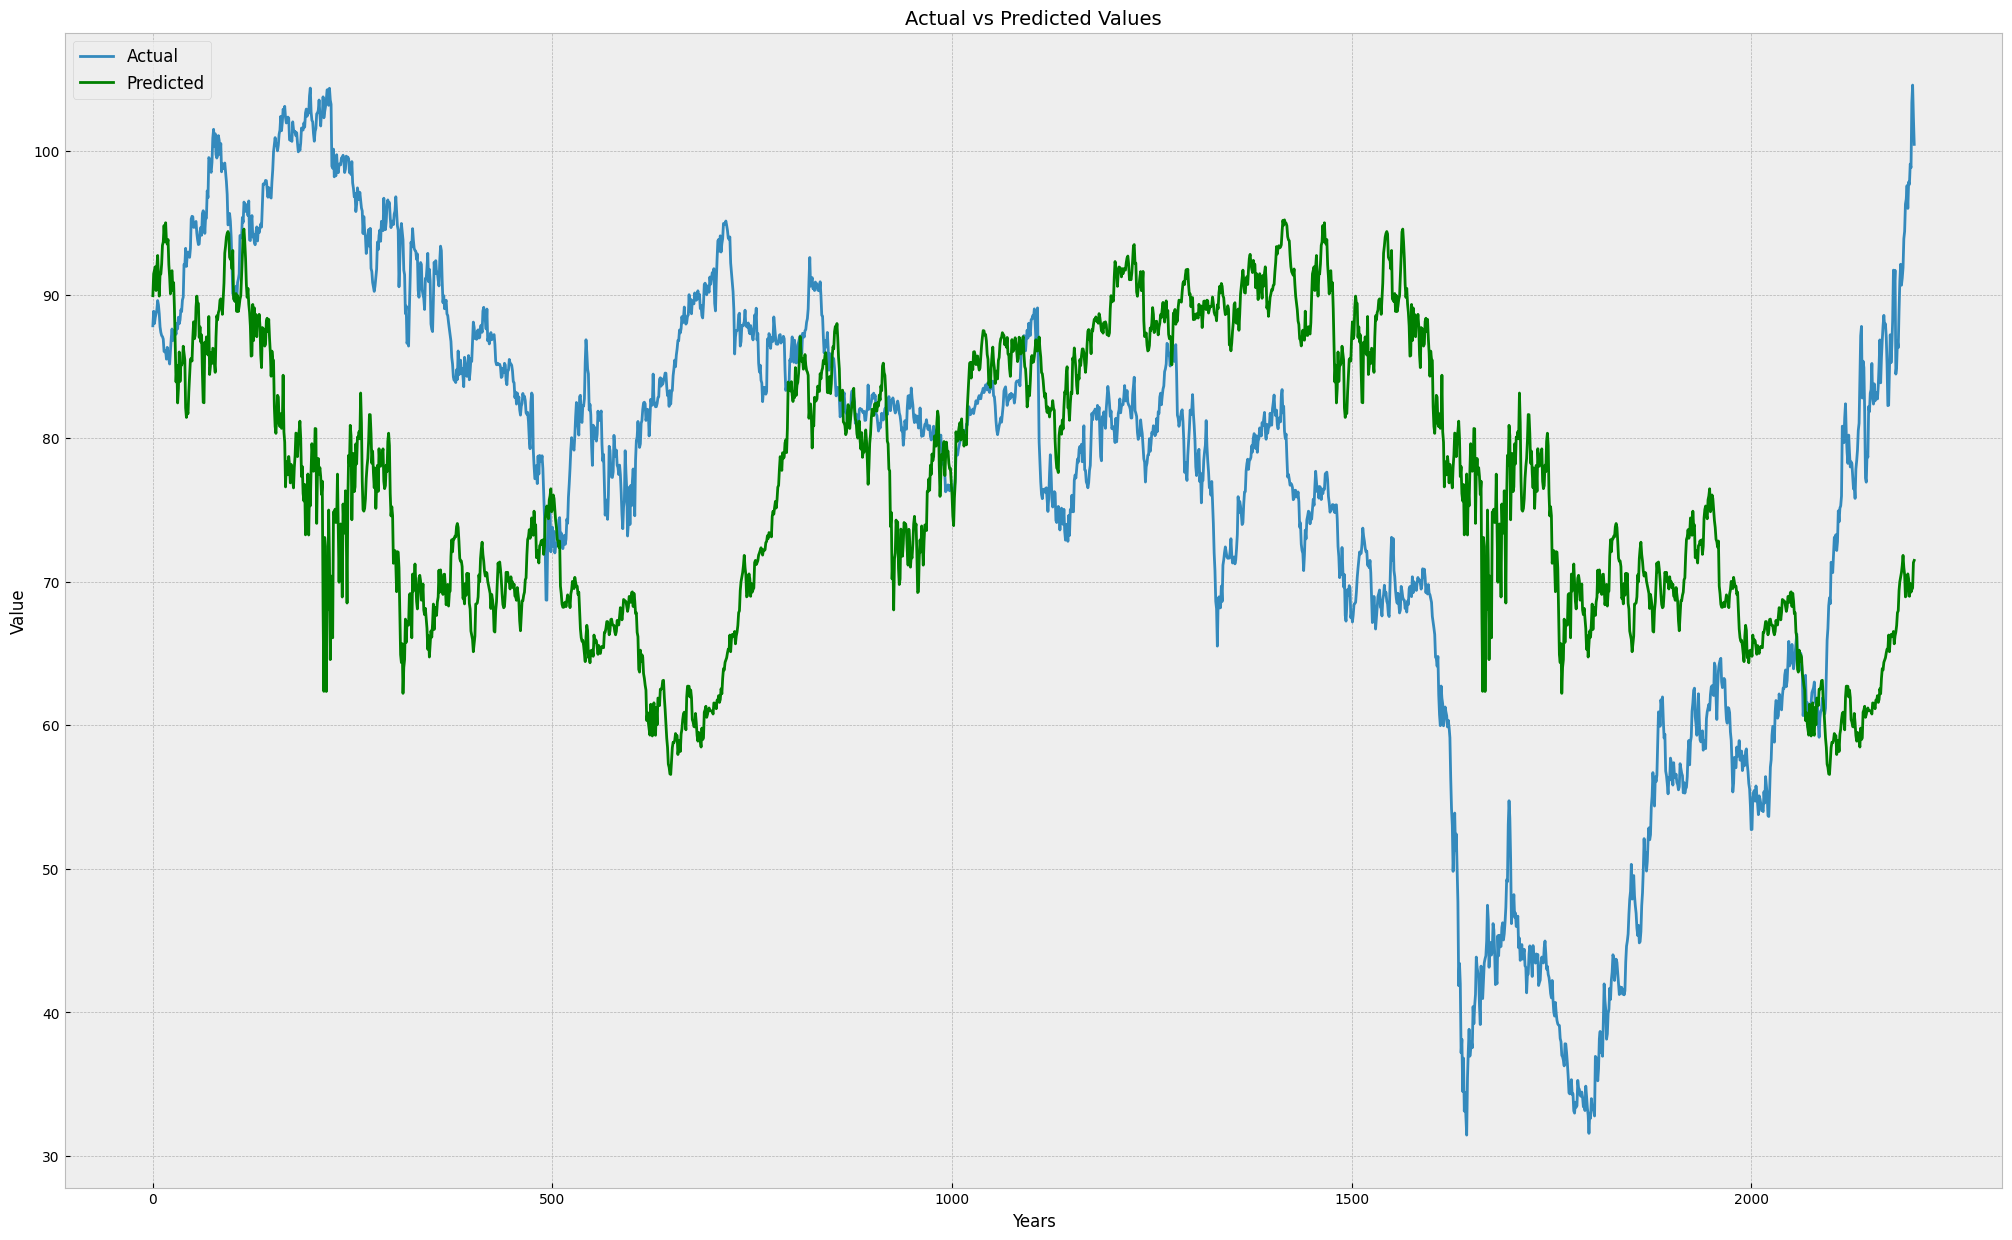

In [21]:
plt.figure(figsize=(25, 15))
plt.plot(y_test, '-', label='Actual')
plt.plot(preds, '-', color='green', label='Predicted')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.title('Actual vs Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.show()

### Mean squared error ###
***
---

In [22]:
print("MSE:", mean_squared_error(preds, y_test))



MSE: 308.38860471655323


In [23]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse}")
print(f"R-squared: {r2}")



from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(tree, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")


Mean squared error: 5.393051020408164
R-squared: 0.9798439948927765
Cross-validation scores: [0.90069769 0.93896071 0.98312665 0.94688614 0.8939514 ]


In [24]:
df.iloc[5000,:]

Value    69.67
t-4      69.19
t-3      68.52
t-2      67.82
t-1      68.03
Name: 2019-11-21 00:00:00, dtype: float64

In [25]:
new_data = df.iloc[5000,1:].values.reshape(1, -1)
new_pred = tree.predict(new_data)
print(f"New prediction: {new_pred}")

New prediction: [67.41]


In [26]:
import joblib
joblib.dump(tree, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

In [29]:
X_test

array([[ 87.76,  87.35,  87.25,  88.04],
       [ 87.35,  87.25,  88.04,  87.82],
       [ 87.25,  88.04,  87.82,  88.84],
       ...,
       [ 97.67,  99.09,  98.84, 103.37],
       [ 99.09,  98.84, 103.37, 104.59],
       [ 98.84, 103.37, 104.59, 102.33]])

In [28]:
import joblib

model = joblib.load("decision_tree_model.joblib")

predictions = model.predict(X_test)
pr = pd.DataFrame(predictions)
print(pr)

          0
0     89.92
1     87.25
2     87.06
3     85.79
4     88.41
...     ...
2200  94.03
2201  94.03
2202  94.03
2203  94.03
2204  94.03

[2205 rows x 1 columns]
